In [21]:
%run data_loader.ipynb

white wine columns Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
read wine None
<class 'pandas.core.frame.Data

In [25]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'
red_wine['quality_label'] = red_wine['quality'].apply(lambda value:
                                                     'low' if value<=5 else 'medium'
                                                      if value <=7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
                                          categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value:
                                                     'low' if value<=5 else 'medium'
                                                      if value <=7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
                                          categories=['low', 'medium', 'high'])

In [26]:
wines = pd.concat([red_wine, white_wine], axis=0)
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
print(wines.shape, red_wine.shape, white_wine.shape)
print(wines.info())

(6497, 14) (1599, 14) (4898, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
wine_type               6497 non-null object
quality_label           6497 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 666.4+ KB
None


In [27]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


## Descriptive Statistics

In [38]:
round(wines.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [39]:
round(red_wine.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [40]:
round(white_wine.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [177]:
subset_attributes=['density', 'residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol',
                  'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs,ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                                \
                  density residual sugar total sulfur dioxide sulphates   
count             1599.00        1599.00              1599.00   1599.00   
mean                 1.00           2.54                46.47      0.66   
std                  0.00           1.41                32.90      0.17   
min                  0.99           0.90                 6.00      0.33   
25%                  1.00           1.90                22.00      0.55   
50%                  1.00           2.20                38.00      0.62   
75%                  1.00           2.60                62.00      0.73   
max                  1.00          15.50               289.00      2.00   

                                         White Wine Statistics                 \
       alcohol volatile acidity  quality               density residual sugar   
count  1599.00          1599.00  1599.00               4898.00        4898.00   
mean     10.42             0.53     5.64                  0.99           6.39   
std       1.07             0.18     0.81                  0.00           5.07   
min       8.40             0.12     3.00                  0.99           0.60   
25%       9.50             0.39     5.00                  0.99           1.70   
50%      10.20             0.52     6.00                  0.99           5.20   
75%      11.10             0.64     6.00                  1.00           9.90   
max      14.90             1.58     8.00                  1.04          65.80   

                                                                         
      total sulfur dioxide sulphates  alcohol volatile acidity  quality  
count              4898.00   4898.00  4898.00          4898.00  4898.00  
mean                138.36      0.49    10.51             0.28     5.88  
std                  42.50      0.11     1.23             0.10     0.89  
min                   9.00      0.22     8.00             0.08     3.00  
25%                 108.00      0.41     9.50             0.21     5.00  
50%                 134.00      0.47    10.40             0.26     6.00  
75%                 167.00      0.55    11.40             0.32     6.00  
max                 440.00      1.08    14.20             1.10     9.00

In [37]:
subset_attributes=['alcohol', 'volatile acidity', 'pH', 'quality' ]
ls=round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms=round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs=round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls,ms,hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])


Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

## Inferential Statistics

In [44]:
from scipy import stats
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
                     wines[wines['quality_label'] == 'medium']['alcohol'],
                      wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol', 'F Statistics:', F, 'p-value:', p)

ANOVA test for mean alcohol F Statistics: 673.074534723 p-value: 2.27153374506e-266


In [45]:
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['pH'],
                     wines[wines['quality_label'] == 'medium']['pH'],
                      wines[wines['quality_label'] == 'high']['pH'])
print('ANOVA test for mean pH', 'F Statistics:', F, 'p-value:', p)

ANOVA test for mean pH F Statistics: 1.23638608035 p-value: 0.290500277977


In [46]:
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['volatile acidity'],
                     wines[wines['quality_label'] == 'medium']['volatile acidity'],
                      wines[wines['quality_label'] == 'high']['volatile acidity'])
print('ANOVA test for mean volatile acidity', 'F Statistics:', F, 'p-value:', p)

ANOVA test for mean volatile acidity F Statistics: 250.339144753 p-value: 1.84722859673e-105


Text(0,0.5,'Wine Volatile Acidity')

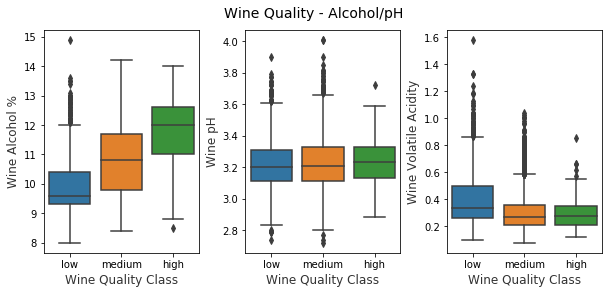

In [65]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
f.suptitle('Wine Quality - Alcohol/pH', fontsize=14)
f.subplots_adjust(top=0.9, wspace=0.3)
sns.boxplot(x="quality_label", y="alcohol", data=wines, ax=ax1)
ax1.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
sns.boxplot(x="quality_label", y="pH", data=wines, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine pH",size = 12,alpha=0.8)
sns.boxplot(x="quality_label", y="volatile acidity", data=wines, ax=ax3)
ax3.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax3.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

## Univariate Analysis

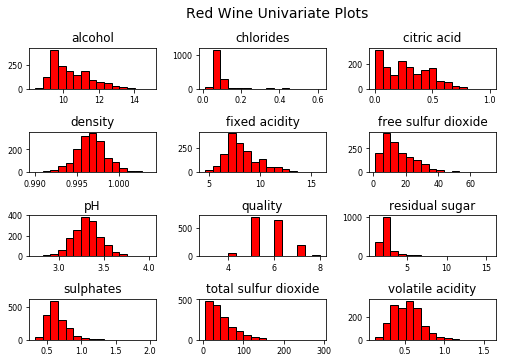

In [72]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0,0,1.2,1.2))
rt=plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)

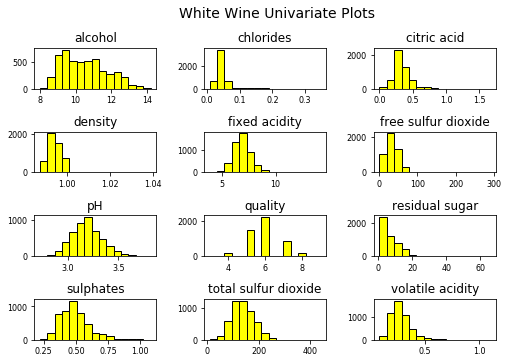

In [176]:
white_wine.hist(bins=15, color='yellow', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0,0,1.2,1.2))
rt=plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)

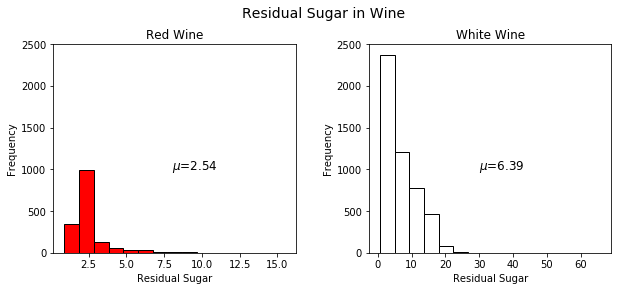

In [77]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle('Residual Sugar in Wine', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)),
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(30, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)),
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'], color='white', bins=15,
                                    edgecolor='black', linewidth=1)

([6, 5, 7, 8, 4, 3, 9], [2198, 1457, 880, 175, 163, 20, 5])


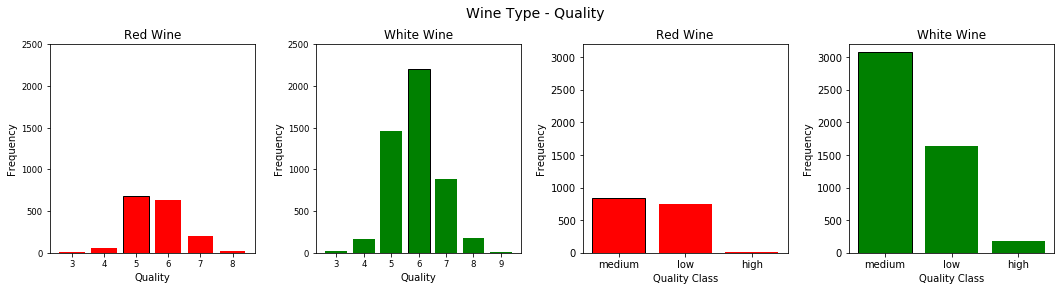

In [98]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
        edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
print(ww_q)
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='green', 
        edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = red_wine['quality_label'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', 
        edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = white_wine['quality_label'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='green', 
        edgecolor='black', linewidth=1, tick_label =ww_q[0])

## Multivariate Analysis

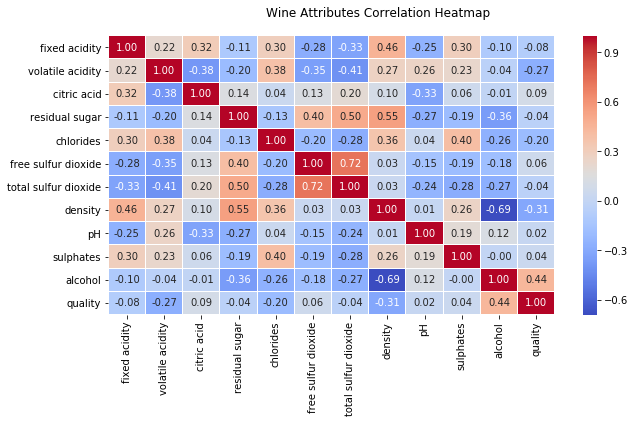

In [120]:
f, ax = plt.subplots(figsize=(10,5))
corr=wines.corr()
hm=sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=0.05)
f.subplots_adjust(top=0.9)
t=f.suptitle('Wine Attributes Correlation Heatmap', fontsize=12)


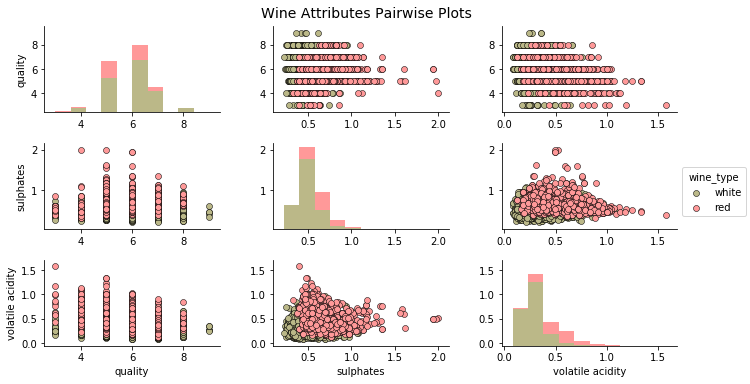

In [151]:
cols=['quality', 'sulphates', 'volatile acidity', 'wine_type']
pp=sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8,
               palette={'red':'#FF9999', 'white': '#BBB888'},
               plot_kws=dict(edgecolor='black', linewidths=0.5))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t=fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

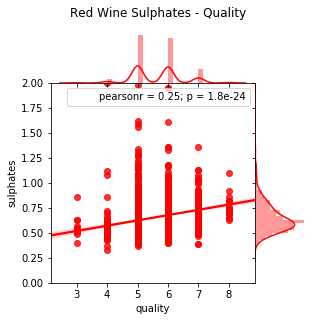

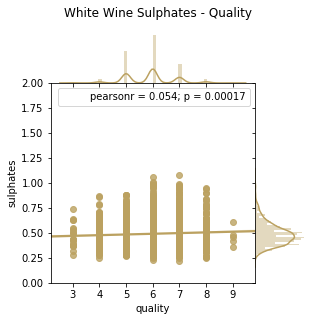

In [166]:
rj = sns.jointplot(x='quality', y='sulphates', data=red_wine,
                   kind='reg', ylim=(0, 2),  
                   color='red', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize=12)
wj = sns.jointplot(x='quality', y='sulphates', data=white_wine,
                   kind='reg', ylim=(0, 2),
                   color='#BBA160', space=0, size=4.5, ratio=4)
wj.ax_joint.set_xticks(list(range(3,10)))
fig = wj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('White Wine Sulphates - Quality', fontsize=12)

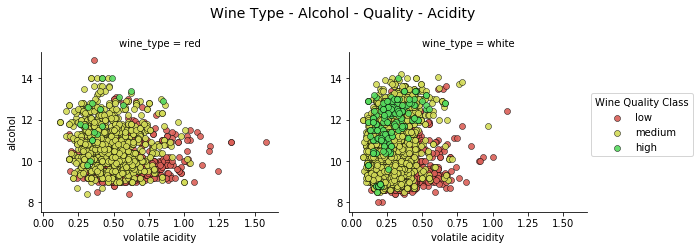

In [173]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label',
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.hls_palette())
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9,
      edgecolor='black', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

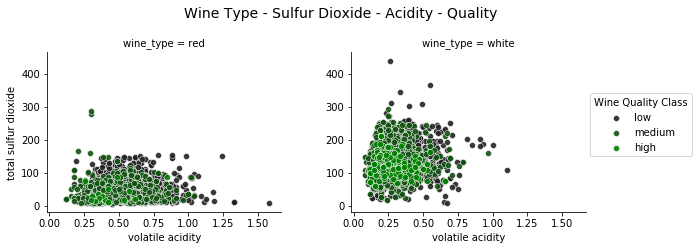

In [172]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label',
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.dark_palette('green', 3))
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9,
      edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

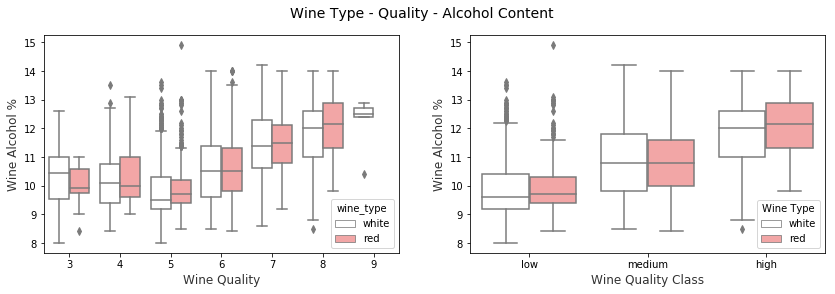

In [174]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)
sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

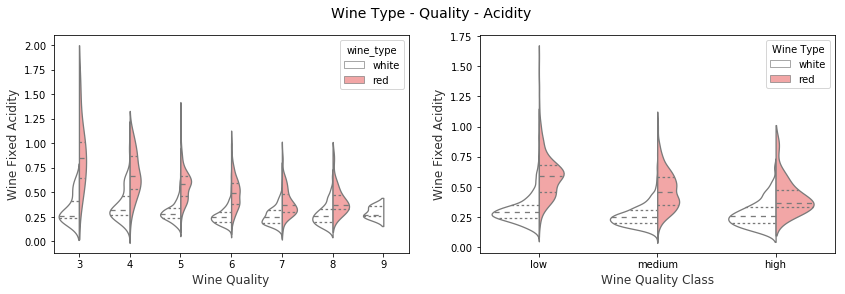

In [175]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)
sns.violinplot(x="quality", y="volatile acidity", hue="wine_type",
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)
sns.violinplot(x="quality_label", y="volatile acidity", hue="wine_type",
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')